In [7]:
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
#import data
df = pd.read_csv('Diabetes.csv', index_col=0)

df

,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,DiabetesPedigreeFunction,Umur,Hasil
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
#data understanding
print('data :', df.shape)

data : (768, 9)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Kehamilan                 768 non-null    int64  
 1   Glukosa                   768 non-null    int64  
 2   Tekanan Darah             768 non-null    int64  
 3   Ketebalan Kulit           768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Umur                      768 non-null    int64  
 8   Hasil                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [11]:
df[['Kehamilan','Tekanan Darah','BMI','Umur']].describe()

,Kehamilan,Tekanan Darah,BMI,Umur
count,768.000000,768.000000,768.000000,768.000000
mean,3.845052,69.105469,31.992578,33.240885
std,3.369578,19.355807,7.884160,11.760232
min,0.000000,0.000000,0.000000,21.000000
25%,1.000000,62.000000,27.300000,24.000000
50%,3.000000,72.000000,32.000000,29.000000
75%,6.000000,80.000000,36.600000,41.000000
max,17.000000,122.000000,67.100000,81.000000


In [12]:
df.Hasil.value_counts()

Hasil
0    500
1    268
Name: count, dtype: int64

In [13]:
#claening data

df.isnull().sum()

Kehamilan                   0
Glukosa                     0
Tekanan Darah               0
Ketebalan Kulit             0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Umur                        0
Hasil                       0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

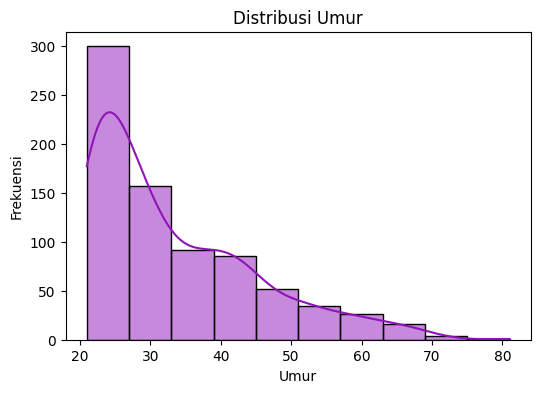

In [16]:
#EDA/ Exploratory Data Analysis

plt.figure(figsize=(6, 4))
sns.histplot(data = df, x='Umur', kde=True, bins=10, color='#8f14b8')

plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()
             

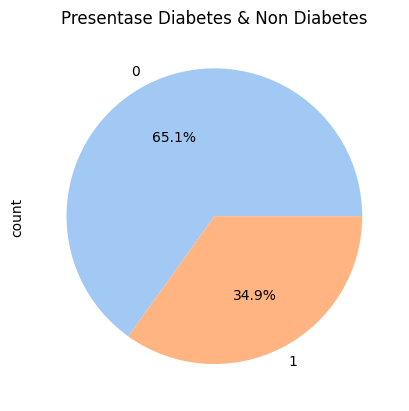

In [19]:
sns.set_palette('pastel')
df['Hasil'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.title('Presentase Diabetes & Non Diabetes')
plt.show()

In [20]:
df.corr()

,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,DiabetesPedigreeFunction,Umur,Hasil
Kehamilan,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glukosa,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Tekanan Darah,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Ketebalan Kulit,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Umur,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Hasil,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

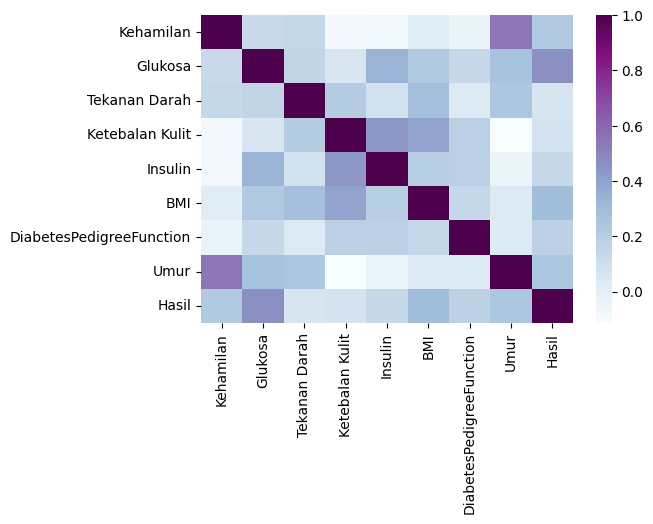

In [21]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), cmap='BuPu')



In [23]:
#Preparation data
x=df.drop(columns=['Hasil'])
y=df['Hasil']

print('x :',x.shape)
print('y :',y.shape)


x : (768, 8)
y : (768,)


In [24]:
scaler= StandardScaler()
scaler.fit(x)
x= scaler.transform(x)



In [27]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.2, random_state=42)

In [29]:
# Modeling & Evaluasi
clf= SVC(kernel='linear')
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
CLF_acc = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred))
print('Accuracy SVM : {:.2f}%'.format(CLF_acc*100))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

Accuracy SVM : 75.97%


In [37]:
#testing
new_data = {'Kehamilan':[1],
           'Glukosa' :[170],
            'Tekanan Darah' :[80],
            'Ketebalan Kulit':[35],
            'Insulin':[0],
            'BMI':[66.5],
            'DiabetesPedigreeFunction':[0.700],
            'Umur':[41]
           }
New =pd.DataFrame(new_data)
New 

,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,DiabetesPedigreeFunction,Umur
0,1,170,80,35,0,66.5,0.7,41


In [38]:
scaler_new_data = scaler.transform(New)
y_pred_new = clf.predict(scaler_new_data)

print('Diagnosis Diabetes :',y_pred_new)

Diagnosis Diabetes : [1]
